In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_palette("icefire")

In [16]:
from pathlib import Path

simple_results_path = Path("../data/evals/simple_results.jsonl").resolve()
agentic_results_path = Path("../data/evals/agentic_results.jsonl").resolve()
with simple_results_path.open("r") as f:
    simple_results = pd.read_json(f, lines=True)
with agentic_results_path.open("r") as f:
    agentic_results = pd.read_json(f, lines=True)
# agentic_results = pd.read_json("data/evals/agentic_results.jsonl", lines=True)

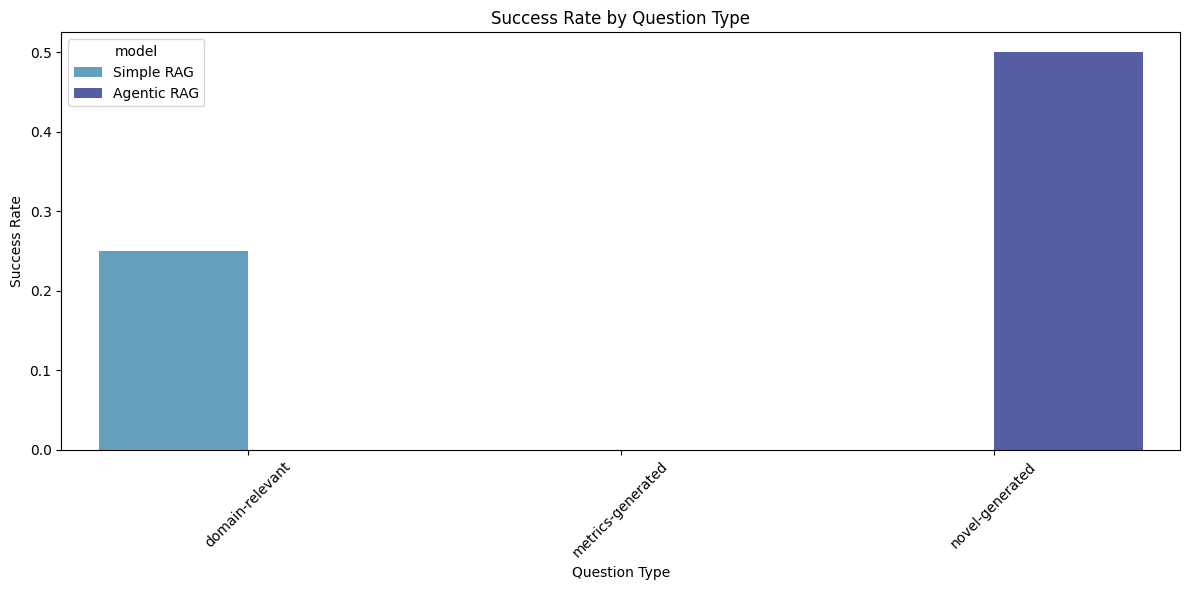


Success rates by question type:

Simple RAG:
    question_type  score
  domain-relevant   0.25
metrics-generated   0.00
  novel-generated   0.00

Agentic RAG:
    question_type  score
  domain-relevant    0.0
metrics-generated    0.0
  novel-generated    0.5


In [17]:
# Calculate success rates by question type for both models
simple_by_type = simple_results.groupby("question_type")["score"].mean().reset_index()
agentic_by_type = agentic_results.groupby("question_type")["score"].mean().reset_index()

# Create a combined dataframe for plotting
plot_data = pd.concat([simple_by_type.assign(model="Simple RAG"), agentic_by_type.assign(model="Agentic RAG")])

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data, x="question_type", y="score", hue="model")
plt.title("Success Rate by Question Type")
plt.xlabel("Question Type")
plt.ylabel("Success Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the actual numbers
print("\nSuccess rates by question type:")
print("\nSimple RAG:")
print(simple_by_type.to_string(index=False))
print("\nAgentic RAG:")
print(agentic_by_type.to_string(index=False))